In [1]:
# system stuff..
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# data manipulation
import numpy as np
import pandas as pd

# library for visulaization
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

# models
from sklearn.ensemble import RandomForestClassifier

# stats
from scipy import stats

In [2]:
train = pd.read_csv("data/train.csv",index_col='id')
test = pd.read_csv("data/test.csv",index_col='id')

In [3]:
# label encoder
for c in tqdm(train.columns):
    if train[c].dtype=='object': 
        lbl = LabelEncoder()
        lbl.fit(list(train[c].values) + list(test[c].values))
        train[c] = lbl.transform(train[c].values)
        test[c] = lbl.transform(test[c].values)

100%|██████████| 31/31 [00:04<00:00,  6.95it/s]


### Outler detection and removal

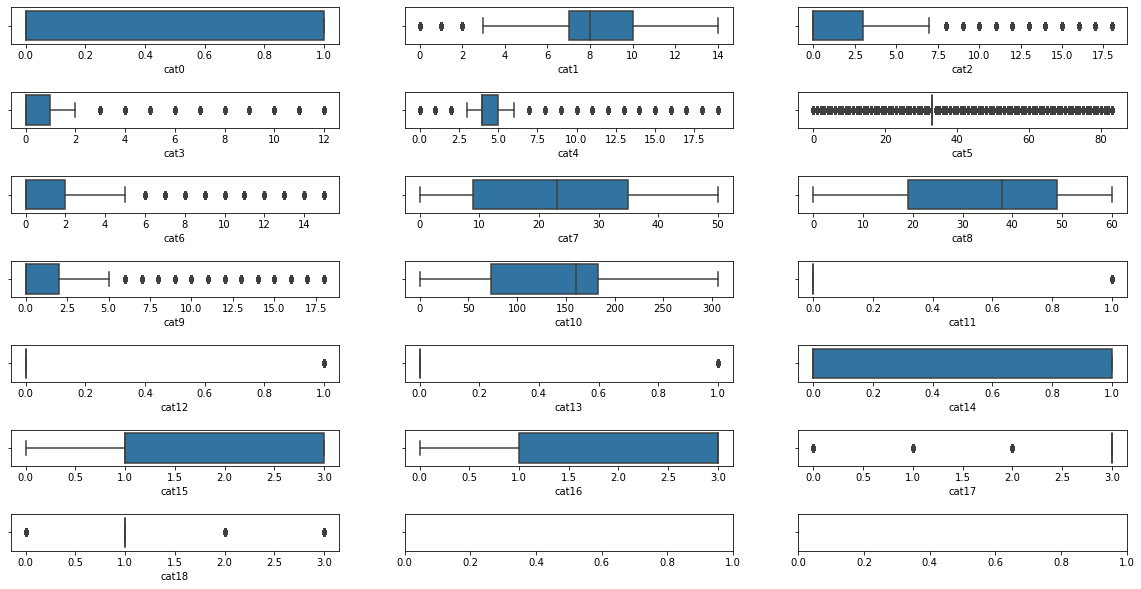

In [4]:
fig, (
      (ax0, ax1, ax2),
      (ax3, ax4, ax5),
      (ax6, ax7, ax8),
      (ax9, ax10, ax11),
      (ax12, ax13, ax14),
      (ax15, ax16, ax17),
      (ax18, ax19, ax20)
    ) = plt.subplots(nrows=7, ncols=3, sharey=True, figsize=(20, 10))

plt.subplots_adjust(hspace=1.3) 

sns.boxplot(x=train.cat0, ax=ax0)
sns.boxplot(x=train.cat1, ax=ax1)
sns.boxplot(x=train.cat2, ax=ax2)
sns.boxplot(x=train.cat3, ax=ax3)
sns.boxplot(x=train.cat4, ax=ax4)
sns.boxplot(x=train.cat5, ax=ax5)
sns.boxplot(x=train.cat6, ax=ax6)
sns.boxplot(x=train.cat7, ax=ax7)
sns.boxplot(x=train.cat8, ax=ax8)
sns.boxplot(x=train.cat9, ax=ax9)
sns.boxplot(x=train.cat10, ax=ax10)
sns.boxplot(x=train.cat11, ax=ax11)
sns.boxplot(x=train.cat12, ax=ax12)
sns.boxplot(x=train.cat13, ax=ax13)
sns.boxplot(x=train.cat14, ax=ax14)
sns.boxplot(x=train.cat15, ax=ax15)
sns.boxplot(x=train.cat16, ax=ax16)
sns.boxplot(x=train.cat17, ax=ax17)
sns.boxplot(train.cat18,ax=ax18)

plt.show()

In [5]:
for i in train.columns:
    if i != 'target':
        q1 = train[i].quantile(0.25)
        q3 = train[i].quantile(0.75)
        iqr = q3 - q1
        train[i] = train[i][~((train[i]<(q1-1.5*iqr)) | (train[i]>(q3+1.5*iqr)))]

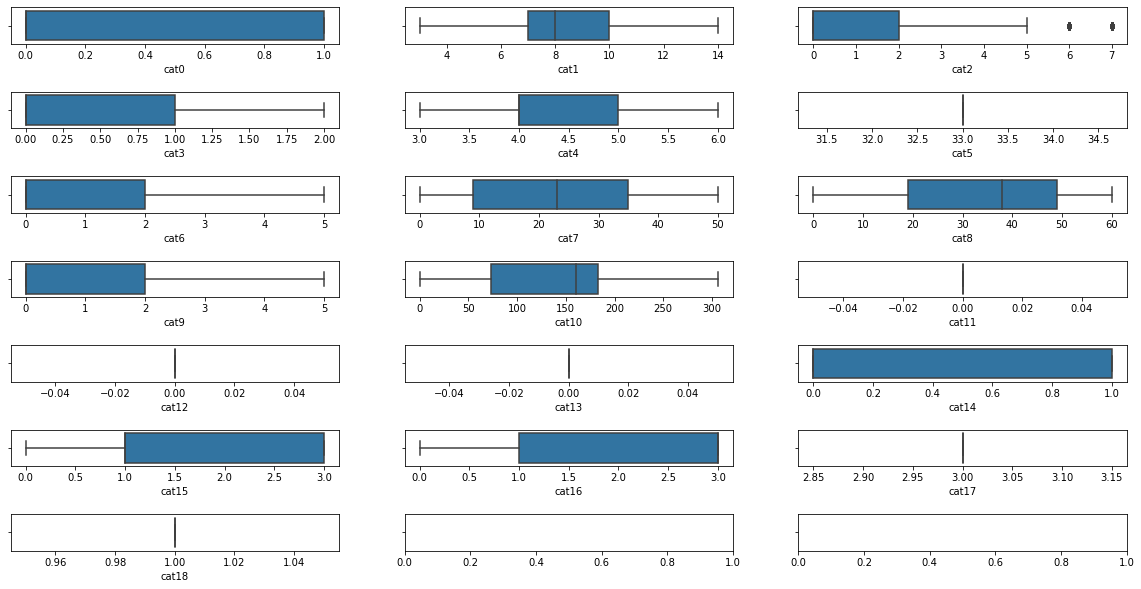

In [6]:
fig, (
      (ax0, ax1, ax2),
      (ax3, ax4, ax5),
      (ax6, ax7, ax8),
      (ax9, ax10, ax11),
      (ax12, ax13, ax14),
      (ax15, ax16, ax17),
      (ax18, ax19, ax20)
    ) = plt.subplots(nrows=7, ncols=3, sharey=True, figsize=(20, 10))

plt.subplots_adjust(hspace=1.3) 

sns.boxplot(x=train.cat0, ax=ax0)
sns.boxplot(x=train.cat1, ax=ax1)
sns.boxplot(x=train.cat2, ax=ax2)
sns.boxplot(x=train.cat3, ax=ax3)
sns.boxplot(x=train.cat4, ax=ax4)
sns.boxplot(x=train.cat5, ax=ax5)
sns.boxplot(x=train.cat6, ax=ax6)
sns.boxplot(x=train.cat7, ax=ax7)
sns.boxplot(x=train.cat8, ax=ax8)
sns.boxplot(x=train.cat9, ax=ax9)
sns.boxplot(x=train.cat10, ax=ax10)
sns.boxplot(x=train.cat11, ax=ax11)
sns.boxplot(x=train.cat12, ax=ax12)
sns.boxplot(x=train.cat13, ax=ax13)
sns.boxplot(x=train.cat14, ax=ax14)
sns.boxplot(x=train.cat15, ax=ax15)
sns.boxplot(x=train.cat16, ax=ax16)
sns.boxplot(x=train.cat17, ax=ax17)
sns.boxplot(train.cat18,ax=ax18)

plt.show()

In [7]:
train.isnull().sum()

cat0          0
cat1      19097
cat2      41062
cat3      16841
cat4      35264
cat5      61437
cat6      23398
cat7          0
cat8          0
cat9      26809
cat10         0
cat11     41068
cat12     42861
cat13      7288
cat14         0
cat15         0
cat16         0
cat17     52875
cat18     44518
cont0         0
cont1         0
cont2         0
cont3         0
cont4         0
cont5         0
cont6         0
cont7         0
cont8      1915
cont9         9
cont10    35952
target        0
dtype: int64

In [8]:
for i in train.columns:
    if train[i].isnull().sum() > 0:
        train[i].fillna(train[i].mean(), inplace=True)

In [9]:
for i in test.columns:
    if i != 'target':
        q1 = test[i].quantile(0.25)
        q3 = test[i].quantile(0.75)
        iqr = q3 - q1
        test[i] = test[i][~((test[i]<(q1-1.5*iqr)) | (test[i]>(q3+1.5*iqr)))]

In [10]:
test.isnull().sum()

cat0          0
cat1          0
cat2      27540
cat3      11418
cat4      23533
cat5      41084
cat6      15622
cat7          0
cat8          0
cat9      12596
cat10         0
cat11     27414
cat12     28902
cat13      4984
cat14         0
cat15         0
cat16         0
cat17     34934
cat18     29932
cont0         0
cont1         0
cont2         0
cont3         0
cont4         0
cont5         0
cont6         0
cont7         0
cont8      1292
cont9         2
cont10    24108
dtype: int64

In [11]:
for i in test.columns:
    if test[i].isnull().sum() > 0:
        test[i].fillna(test[i].mean(), inplace=True)

In [12]:
def wrangle(X):

    # simple difference
    X['diff_1'] = abs(X['cat0'] - X['cat1'])
    X['diff_2'] = abs(X['cat2'] - X['cat3'])
    X['diff_3'] = abs(X['cat4'] - X['cat5'])
    X['diff_4'] = abs(X['cat6'] - X['cat7'])
    X['diff_5'] = abs(X['cat8'] - X['cat9'])
    X['diff_6'] = abs(X['cat10'] - X['cat11'])
    X['diff_7'] = abs(X['cat12'] - X['cat13'])
    X['diff_8'] = abs(X['cat14'] - X['cat15'])
    X['diff_8'] = abs(X['cat16'] - X['cat17'])
    X['diff_8'] = abs(X['cat18'] - X['cat0']) 
    X['diff_9'] = abs(X['cont0'] - X['cont1'])
    X['diff_10'] = abs(X['cont2'] - X['cont3'])
    X['diff_11'] = abs(X['cont4'] - X['cont5'])
    X['diff_12'] = abs(X['cont6'] -X['cont7'])
    X['diff_13'] = abs(X['cont8'] -X['cont9'])
    X['diff_14'] = abs(X['cont10'] -X['cont0'])
    
    # ratio a
    X['rat_1'] = 1 / (X['cont0'] + X['cont1']**2)
    X['rat_2'] = 1 / (X['cont2'] + X['cont3']**2)
    X['rat_3'] = 1 / (X['cont4'] + X['cont5']**2)
    X['rat_4'] = 1 / (X['cont6'] + X['cont7']**2)
    X['rat_5'] = 1 / (X['cont8'] + X['cont9']**2)
    X['rat_6'] = 1 / (X['cont10'] + X['cont7']**2)
    
    # pow
    X['pow_0'] = X['cont0']**2
    X['pow_1'] = X['cont1']**2
    X['pow_2'] = X['cont2']**2
    X['pow_3'] = X['cont3']**2
    X['pow_4'] = X['cont4']**2
    X['pow_5'] = X['cont5']**2
    X['pow_6'] = X['cont6']**2
    X['pow_7'] = X['cont7']**2
    X['pow_8'] = X['cont8']**2
    X['pow_9'] = X['cont9']**2
    X['pow_10'] = X['cont10']**2
    
    # sqrt
    X['sqrt_0'] = np.sqrt(X['cont0'])
    X['sqrt_1'] = np.sqrt(X['cont1'])
    X['sqrt_2'] = np.sqrt(X['cont2'])
    X['sqrt_3'] = np.sqrt(X['cont3'])
    X['sqrt_4'] = np.sqrt(X['cont4'])
    X['sqrt_5'] = np.sqrt(X['cont5'])
    X['sqrt_6'] = np.sqrt(X['cont6'])
    X['sqrt_7'] = np.sqrt(X['cont7'])
    X['sqrt_8'] = np.sqrt(X['cont8'])
    X['sqrt_9'] = np.sqrt(X['cont9'])
    X['sqrt_10'] = np.sqrt(X['cont10'])
    
    # polynomial a
    X['poly_0'] = 1 + 5*X['cont0'] + 8*X['cont0']**2
    X['poly_1'] = 1 + 5*X['cont1'] + 8*X['cont1']**2
    X['poly_2'] = 1 + 5*X['cont2'] + 8*X['cont2']**2
    X['poly_3'] = 1 + 5*X['cont3'] + 8*X['cont3']**2
    X['poly_4'] = 1 + 5*X['cont4'] + 8*X['cont4']**2
    X['poly_5'] = 1 + 5*X['cont5'] + 8*X['cont5']**2
    X['poly_6'] = 1 + 5*X['cont6'] + 8*X['cont6']**2
    X['poly_7'] = 1 + 5*X['cont7'] + 8*X['cont7']**2
    X['poly_8'] = 1 + 5*X['cont8'] + 8*X['cont8']**2
    X['poly_9'] = 1 + 5*X['cont9'] + 8*X['cont9']**2
    X['poly_10'] =1 + 5*X['cont10'] + 8*X['cont10']**2
    
    
    # polynomial b
    X['poly_b_0'] = X['cont0'] / X['cont0']**2
    X['poly_b_1'] = X['cont1'] / X['cont1']**2
    X['poly_b_2'] = X['cont2'] / X['cont2']**2
    X['poly_b_3'] = X['cont3'] / X['cont3']**2
    X['poly_b_4'] = X['cont4'] / X['cont4']**2
    X['poly_b_5'] = X['cont5'] / X['cont5']**2
    X['poly_b_6'] = X['cont6'] / X['cont6']**2
    X['poly_b_7'] = X['cont7'] / X['cont7']**2
    X['poly_b_8'] = X['cont8'] / X['cont8']**2
    X['poly_b_9'] = X['cont9'] / X['cont9']**2
    X['poly_b_10'] = X['cont10'] / X['cont10']**2
    
    # polynomial 2
    X['drat_1'] = 1 / (5*X['cont0'] + 8*X['cont1']**2)
    X['drat_2'] = 1 / (5*X['cont2'] + 8*X['cont3']**2)
    X['drat_3'] = 1 / (5*X['cont4'] + 8*X['cont5']**2)
    X['drat_4'] = 1 / (5*X['cont6'] + 8*X['cont7']**2)
    X['drat_5'] = 1 / (5*X['cont8'] + 8*X['cont9']**2)
    X['drat_6'] = 1 / (5*X['cont10'] + 8*X['cont7']**2)
    
    return X

In [13]:
train = wrangle(train)
test = wrangle(test)

In [14]:
for i in train.columns:
    if train[i].isnull().sum() > 0:
        train[i].fillna(train[i].mean(), inplace=True)

In [15]:
for i in test.columns:
    if test[i].isnull().sum() > 0:
        test[i].fillna(test[i].mean(), inplace=True)

In [16]:
train.head(3)

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,poly_b_7,poly_b_8,poly_b_9,poly_b_10,drat_1,drat_2,drat_3,drat_4,drat_5,drat_6
id,,,,,,,,,,,,,,,,,,,,,
0,0,8.0,0.0,1.0,4.416517,33.0,0.000000,44,54,0.000000,...,1.262753,1.226612,1.036263,1.501693,0.111083,0.112862,0.153813,0.125344,0.086759,0.119808
1,0,8.0,0.0,0.0,4.000000,33.0,0.764825,48,3,5.000000,...,2.446776,2.504053,1.078277,2.025402,0.367756,0.233834,0.336819,0.230600,0.112645,0.262816
2,0,10.0,0.0,0.0,4.000000,33.0,0.000000,30,38,0.920989,...,2.571786,2.425400,3.416520,1.819994,0.298981,0.210288,0.155913,0.336688,0.364049,0.252729


In [17]:
test.head(3)

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,poly_b_7,poly_b_8,poly_b_9,poly_b_10,drat_1,drat_2,drat_3,drat_4,drat_5,drat_6
id,,,,,,,,,,,,,,,,,,,,,
5,0,5,0.0,0.0,5.0,33.0,0.000000,8,23,0.0,...,1.525104,1.671317,2.777874,2.226753,0.127056,0.141334,0.463958,0.161402,0.248239,0.175905
6,0,7,2.0,0.0,4.0,33.0,0.765786,31,51,0.0,...,1.527617,2.874029,1.768284,2.573472,0.260047,0.147505,0.124071,0.213991,0.232654,0.186183
8,0,13,2.0,0.0,5.0,33.0,0.000000,8,28,0.0,...,2.979827,2.930506,3.963709,2.429589,0.257167,0.325194,0.556700,0.215765,0.451388,0.337960


In [18]:
print("Size of new train set:", train.shape)
print("Size of new test set:",test.shape)

Size of new train set: (300000, 101)
Size of new test set: (200000, 100)
